## **0.Pytorch Basics**
Tensors

In [0]:
import torch

In [0]:
x = torch.rand(5,3)
print(x)

y = torch.zeros(5,3)
print(y)

z = y.view(15)
print(z)

In [0]:
# converting torch tensor to numpy array
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)

In [0]:
import numpy as np
# converting numpy array to tensor
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)

In [0]:
# CUDA tensor
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
x = torch.ones(1,5)
print(x)
x = x.to(device)
print(x)

### **Autograd**
automatic differentiation for all operations on Tensors

In [0]:
x = torch.ones(2, 2)
print(x)

x.requires_grad=True
print(x)

x = torch.zeros(2,2, requires_grad=True)
print(x)

In [0]:
y = x + 2
print(y)

In [0]:
z = y * y * 3
out = z.mean()
print(x.grad)

out.backward()

print(x.grad)

In [0]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

In [0]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

## **Part A. Linear Regression**
In this part, we will implement a simple linear regressor with PyTorch

### **Import Necessary Libraries and Create Dummy Data**
We will use synthetic data for this part of Lab 0.

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

### **Linear Regression Model Definition**

In [0]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

### **Instantiate the Model and Define Loss Function/Optimizer**

In [0]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 10


##### For GPU #######
model = linearRegression(inputDim, outputDim) 
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### **Model Training**

In [4]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    inputs = torch.from_numpy(x_train).to(device) 
    labels = torch.from_numpy(y_train).to(device)

    # Clear gradient buffers because we don't want gradients to accumulate after every epoch
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(325.8772, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 0, loss 325.8772277832031
tensor(26.9769, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 1, loss 26.976909637451172
tensor(2.5921, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 2, loss 2.592111110687256
tensor(0.5987, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 3, loss 0.5987446904182434
tensor(0.4318, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 4, loss 0.4318276047706604
tensor(0.4139, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 5, loss 0.41393566131591797
tensor(0.4082, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 6, loss 0.40824761986732483
tensor(0.4036, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 7, loss 0.40360143780708313
tensor(0.3991, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 8, loss 0.3990875780582428
tensor(0.3946, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 9, loss 0.39463043212890625


### **Model Testing**

[[-0.1685735]
 [ 1.9997007]
 [ 4.167975 ]
 [ 6.3362494]
 [ 8.504523 ]
 [10.672797 ]
 [12.841072 ]
 [15.009346 ]
 [17.17762  ]
 [19.345894 ]
 [21.514168 ]]


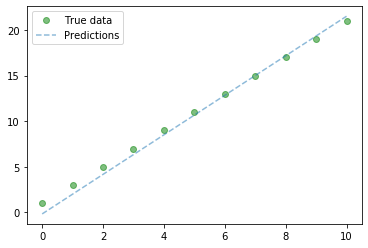

In [5]:
with torch.no_grad():
  predicted = model(torch.from_numpy(x_train).to(device)).cpu().data.numpy()
print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

## **Part B. Logistic Regression**
In this part, we will identify handwritten digits using Logistic Regression in PyTorch

### **Import Necessary Libraries**

In [0]:
import torch 
import torch.nn as nn 
import torchvision.datasets as dsets 
import torchvision.transforms as transforms 
from torch.autograd import Variable 

### **Download MNIST Dataset**

In [7]:
# MNIST Dataset (Images and Labels) 
train_dataset = dsets.MNIST(root ='./data',  
                            train = True,  
                            transform = transforms.ToTensor(), 
                            download = True) 
  
test_dataset = dsets.MNIST(root ='./data',  
                           train = False,  
                           transform = transforms.ToTensor())


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


### **Define Hyperparameters**

In [0]:
# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

### **Construct Dataloaders**

In [0]:
# Dataset Loader (Input Pipline) 
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,  
                                           batch_size = batch_size,  
                                           shuffle = True) 
  
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,  
                                          batch_size = batch_size,  
                                          shuffle = False)

### **Logistic Regression Model Definition**

In [0]:
# Model 
class LogisticRegression(nn.Module): 
    def __init__(self, input_size, num_classes): 
        super(LogisticRegression, self).__init__() 
        self.linear = nn.Linear(input_size, num_classes) 
  
    def forward(self, x): 
        out = self.linear(x) 
        return out 

### **Instantiate the Model and Define Loss Function/Optimizer**

In [0]:
model = LogisticRegression(input_size, num_classes).to(device)
  
# Loss and Optimizer 
# Softmax is internally computed. 
# Set parameters to be updated. 
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate) 

### **Model Training**

In [0]:
# Training the Model 
for epoch in range(num_epochs): 
    for i, (images, labels) in enumerate(train_loader): 
        images = images.view(-1, 28 * 28).to(device)
        labels = labels.to(device)
  
        # Forward + Backward + Optimize 
        optimizer.zero_grad() 
        outputs = model(images) 
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step() 
  
        if (i + 1) % 100 == 0: 
            print(f'Epoch: [{epoch +1}/{num_epochs}],\
            Step: [{i+1}/{len(train_dataset)//batch_size}], Loss: {loss.data}')

### **Model Testing**

In [0]:
# Test the Model 
correct = 0
total = 0
for images, labels in test_loader: 
    images = images.view(-1, 28 * 28).to(device)
    outputs = model(images).cpu()
    _, predicted = torch.max(outputs.data, 1) 
    total += labels.size(0) 
    correct += (predicted == labels).sum() 
  
print(f'Accuracy of the model on the 10000 test images: {100*correct/total}')